# Decision Tree
We will again use the sklearn module to train a decision tree
First, read in and format the data:

In [1]:
import pandas as pd
data = pd.read_csv("data.csv", sep = ",")

# Replace material and infill_pattern with 0 and 1
data.infill_pattern = [0 if each == "grid" else 1 for each in data.infill_pattern]
data.material = [0 if each == "abs" else 1 for each in data.material]

In [16]:
#Note that the number 3 in the code indicates the number of digits after the decimal point for each cell.
correlation = data.corr()
correlation.style.background_gradient(cmap='coolwarm').format(precision=3)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
layer_height,1.000,-0.193,0.003,-0.000,0.000,0.000,-0.056,0.000,-0.000,0.801,0.338,0.508
wall_thickness,-0.193,1.000,0.103,0.145,-0.118,-0.029,-0.420,0.118,-0.029,-0.227,0.400,0.176
infill_density,0.003,0.103,1.000,-0.167,0.239,-0.000,-0.094,-0.263,0.000,0.118,0.358,0.159
infill_pattern,-0.000,0.145,-0.167,1.000,-0.170,0.000,-0.000,0.200,-0.000,-0.068,0.009,0.046
nozzle_temperature,0.000,-0.118,0.239,-0.170,1.000,0.602,-0.000,-0.784,0.602,0.349,-0.406,-0.527
bed_temperature,0.000,-0.029,-0.000,0.000,0.602,1.000,0.000,0.000,1.000,0.192,-0.253,-0.301
print_speed,-0.056,-0.420,-0.094,-0.000,-0.000,0.000,1.000,-0.000,-0.000,0.121,-0.265,-0.234
material,0.000,0.118,-0.263,0.200,-0.784,0.000,-0.000,1.000,-0.000,-0.233,0.290,0.395
fan_speed,-0.000,-0.029,0.000,-0.000,0.602,1.000,-0.000,-0.000,1.000,0.192,-0.253,-0.301
roughness,0.801,-0.227,0.118,-0.068,0.349,0.192,0.121,-0.233,0.192,1.000,0.052,0.099


### Preparing the data

In [17]:
# First, define the initial size (material) as y-values:
y_data = data.material.values

#Now remove the material and all unimportant parameters, add all parameters without correlation to the material:
x_data = data.drop(["material","layer_height","bed_temperature","print_speed","fan_speed"],axis=1)

from sklearn.preprocessing import MinMaxScaler

print(x_data.head())
mm = MinMaxScaler()
x_norm = mm.fit_transform(x_data)
print(x_norm)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm,y_data,test_size = 0.3,random_state=1)

   wall_thickness  infill_density  infill_pattern  nozzle_temperature  \
0               8              90               0                 220   
1               7              90               1                 225   
2               1              80               0                 230   
3               4              70               1                 240   
4               6              90               0                 250   

   roughness  tension_strenght  elongation  
0         25                18         1.2  
1         32                16         1.4  
2         40                 8         0.8  
3         68                10         0.5  
4         92                 5         0.7  
[[0.77777778 1.         0.         0.4        0.01152738 0.42424242
  0.27586207]
 [0.66666667 1.         1.         0.5        0.03170029 0.36363636
  0.34482759]
 [0.         0.875      0.         0.6        0.05475504 0.12121212
  0.13793103]
 [0.33333333 0.75       1.         0.8       

In [4]:
#Import the corresponding module
from sklearn.tree import DecisionTreeClassifier

#define model
#Parameters see: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
DecisionTreeClassifierModel =DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3,min_samples_split=2,
                                    min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,
                                    random_state=0, max_leaf_nodes=5)

In [5]:
DecisionTreeClassifierModel.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, random_state=0)

In [7]:
#some statistics
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))

DecisionTreeClassifierModel Train Score is :  1.0
DecisionTreeClassifierModel Test Score is :  1.0


In [8]:
#Extract classes and important features
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)

DecisionTreeClassifierModel Classes are :  [0 1]
DecisionTreeClassifierModel feature importances are :  [0.         0.         0.15350877 0.84649123 0.         0.
 0.        ]


In [9]:
x_data.head()

,wall_thickness,infill_density,infill_pattern,nozzle_temperature,roughness,tension_strenght,elongation
0,8,90,0,220,25,18,1.2
1,7,90,1,225,32,16,1.4
2,1,80,0,230,40,8,0.8
3,4,70,1,240,68,10,0.5
4,6,90,0,250,92,5,0.7


### Task
What do you conclude from the information above? Which features are specifically important?

## Using metrics

There are a lot of useful functions for displaying the accuracy of predictions. Here is a very simple one:

In [11]:
#Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(x_test)
# Now we calculate the probability of choosing the output for any division
y_pred_prob = DecisionTreeClassifierModel.predict_proba(x_test)
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:10])
# These are the values that we categorized.
print("test values :" ,y_test[:10] )
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob[:10])


Predicted Value for DecisionTreeClassifierModel is :  [1 1 0 1 0 0 1 1 1 0]
test values : [1 1 0 1 0 0 1 1 1 0]
Prediction Probabilities Value for DecisionTreeClassifierModel is :  [[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


Another possibility is to use the ‘metric’ package:

Confusion Matrix is : 
 [[6 0]
 [0 9]]


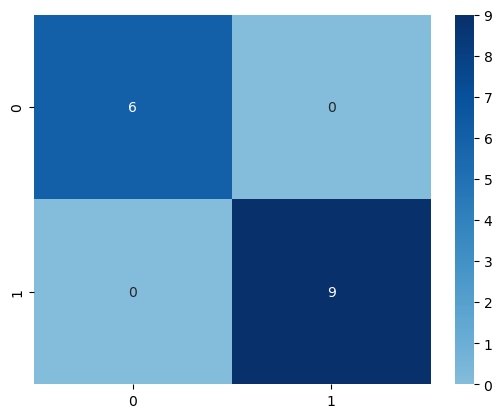

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True, cmap=plt.cm.Blues, annot=True)
plt.show()

This means that a simple decision tree could achieve 100% prediction accuracy.

## Display tree

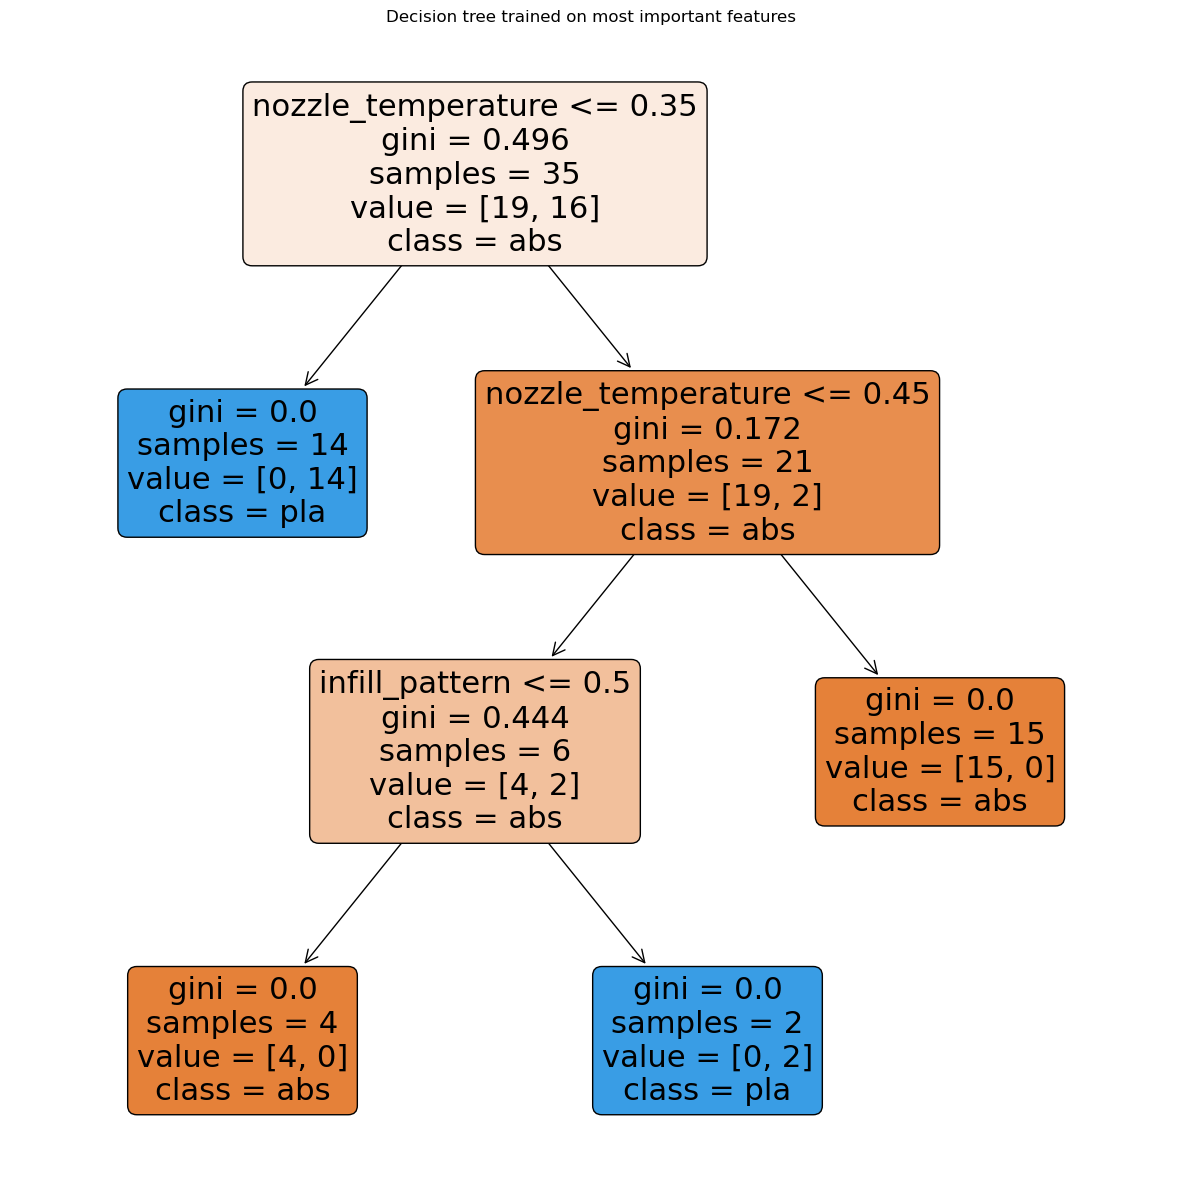

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

class_names = ['abs', 'pla']
feature_names = x_data.columns #['wall_thickness', 'infill_density', 'infill_pattern', 'nozzle_temperature', 'roughness', 'tension_strenght', 'elongation']

plot_tree(DecisionTreeClassifierModel, filled=True, rounded = True, class_names=class_names, feature_names = feature_names)
plt.title("Decision tree trained on most important features")
plt.show()

## Task

Try to see if the new test data set is also recognised as well!

In [14]:
data_new = pd.read_csv("data_neu.csv", sep = ";")

data_new.infill_pattern = [0 if each == "grid" else 1 for each in data_new.infill_pattern]
data_new.material = [0 if each == "abs" else 1 for each in data_new.material]

# prepare data

# First, define the initial size (material) as y-values:
y_data_new = data_new.material.values

#Now remove the material and all unimportant parameters, add all parameters without correlation to the material:
x_data_new = data_new.drop(["material","layer_height","bed_temperature","print_speed","fan_speed"],axis=1)

from sklearn.preprocessing import MinMaxScaler

print(x_data_new.head())
mm = MinMaxScaler()
x_norm_new = mm.fit_transform(x_data_new)
print(x_norm_new)

#Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(x_norm_new)
# Now we calculate the probability of choosing the output for any division
y_pred_prob = DecisionTreeClassifierModel.predict_proba(x_norm_new)
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:4])
# These are the values that we categorized.
print("test values :" ,y_data_new[:4] )
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob[:4])


   wall_thickness  infill_density  infill_pattern  nozzle_temperature  \
0               8              90               0                 225   
1               6              80               1                 230   
2               4              50               0                 250   
3               4              40               0                 220   

   roughness  tension_strenght  elongation  
0         68                 5        0.70  
1         30                14        1.04  
2        168                27        2.40  
3        220                27        3.10  
[[1.         1.         0.         0.16666667 0.2        0.
  0.        ]
 [0.5        0.8        1.         0.33333333 0.         0.40909091
  0.14166667]
 [0.         0.2        0.         1.         0.72631579 1.
  0.70833333]
 [0.         0.         0.         0.         1.         1.
  1.        ]]
Predicted Value for DecisionTreeClassifierModel is :  [1 1 0 1]
test values : [0 1 0 1]
Prediction Proba

Confusion Matrix is : 
 [[1 1]
 [0 2]]


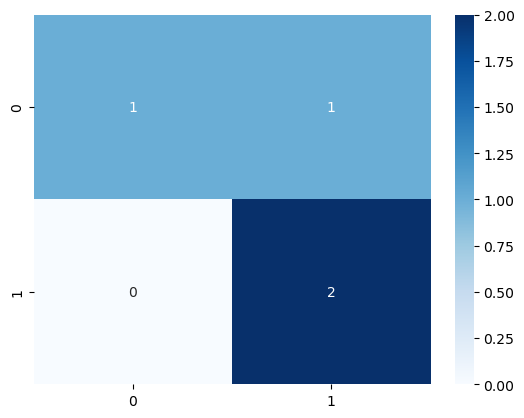

In [15]:
from sklearn.metrics import confusion_matrix

#Calculating Confusion Matrix
CM = confusion_matrix(y_data_new, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True, cmap=plt.cm.Blues, annot=True)
plt.show()